In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn import preprocessing
from sklearn.manifold import TSNE

In [2]:
def load_embeddings(file_name):
    """ Load embeddings

    Loads embeddings and creates a vocabulary.
    All vectors are normalized, which make the cosine_similarity more efficient.

    Parameters
    ----------
    file_name : string
        path to file containing bows

    Returnes
    --------
    vocab : list
        list of all words in vocabulary
    word_embedding : dict
        Dict with all words as keys and their vector as value
    """
    vocab = []
    word_embedding = {}
    with open(file_name) as f:
        for line in f:
            _line = line.split()
            word = _line[0]
            vector = [float(x) for x in _line[1:]]
            if len(vector) == 300:
                l2 = math.sqrt(sum([x*x for x in vector]))
                _vector = [x / l2 for x in vector]
                vocab.append(word)
                word_embedding[word] = _vector
            else:
                print("Could not create embedding for {}".format(word))
    return vocab, word_embedding

In [3]:
print("loading embeddings....")
vocab, word_embedding = load_embeddings("data/vectors.vec")
print(" - done loading")


loading embeddings....
 - done loading


In [6]:
def display_closestwords(words, word_embeddings, path="results/"):
    f, (ax1,ax2,ax3) = plt.subplots(3,1, sharey=True,figsize=(12, 36))
    arr = np.empty((0,300), dtype='f')
    word_labels = words

    # add the vector for each of the closest words to the array
    for word in word_labels:
        if word in word_embeddings.keys():
            wrd_vector = word_embeddings[word]
            arr = np.append(arr, np.array([wrd_vector]), axis=0)
        else:
            print("{} is not in embeddings".format(word))
            break
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    min_max_scaler = preprocessing.MinMaxScaler()
    Y = min_max_scaler.fit_transform(Y)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    x_coords_scatter = Y[:, 0]
    y_coords_scatter = Y[:, 1]
    origo = [(0,0)]*4
    
    # Figure 1
    ax1.set_title("Fig 1: Vector Representation of Words")
    ax1.scatter(x_coords_scatter, y_coords_scatter,linewidths=4,c =["w"]*4)
    c =["#cccc66","#ff6666","#66cc66","#ff99cc"]
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        # Write labels
        ax1.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(4,5), textcoords='offset points',fontsize=15)
        ax1.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i], linewidth=1,alpha = 0.7)
    
    # plot a black point at the origin
    ax1.scatter(0,0,c='#330000')  
    ax1.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=15)
    # Labels axis
    ax1.set_xlabel("X", fontsize = 16)
    ax1.set_ylabel("Y", fontsize = 16)
    extent = ax1.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig(path+'ax1_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.2), dpi=600)
    
    # Create the new vectors
    # DVD - composed
    x_coords_scatter = np.append(x_coords,x_coords[0]-x_coords[1])
    y_coords_scatter = np.append(y_coords,y_coords[0]-y_coords[1])
    x_coords = np.append(x_coords,-x_coords[1])
    y_coords = np.append(y_coords,-y_coords[1])
    word_labels.append(r"$-\vec{composed}$")
    origo.append((x_coords[0],y_coords[0]))
    
    # Movie- composed + book
    x_coords = np.append(x_coords,x_coords[2])
    y_coords = np.append(y_coords,y_coords[2])
    word_labels.append(r"$+\vec{books}$")
    origo.append((x_coords_scatter[-1],y_coords_scatter[-1]))
    
    
    # Actual DVD - composed
    x_coords = np.append(x_coords,x_coords_scatter[-1])
    y_coords = np.append(y_coords,y_coords_scatter[-1])
    word_labels.append(r"$\vec{dvd}-\vec{composed}$")
    origo.append((0,0))
    
    
    # Colors
    c =["#cccc66","#ff6666","#66cc66","#ff99cc","#ff6666","#66cc66","#ff9933"]
    
    # Figure 2
    ax2.set_title(r"Fig 2: Difference Vector $\vec{dvd}-\vec{composed}$")
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        if i< 3:
            if i == 2:
                a = 0.2
            else: 
                a = 0.5
                ax2.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(50,5), textcoords='offset points',fontsize=15)
            ax2.quiver(o[0],o[1], x, y, angles='xy',  scale_units='xy', scale=1,color=c[i],alpha =a)
        elif i == 3:
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha=0.2)
        elif i == 4:
            ax2.annotate(r"%s"%(label), xy=((abs(x)-o[0])/2+o[0],o[1]), xytext=(-40,5), textcoords='offset points',fontsize=15)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.5)  
        elif i == 5:
            pass
        elif i == 6:
            ax2.annotate(r"%s"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(68,30), textcoords='offset points',fontsize=15)
            ax2.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
    
    ax2.scatter(0,0,c='#330000') #<-- plot a black point at the origin
    ax2.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=15)
    ax2.set_xlabel("X", fontsize = 16)
    ax2.set_ylabel("Y", fontsize = 16)
    extent = ax2.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig(path+'ax2_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.2), dpi=600)
    
    # Figure 3
    ax3.set_title(r"Fig 3: Difference Vector + Target Domain $\vec{dvd}-\vec{composed} + \vec{books}$")
    for i,(label, x, y,o) in enumerate(zip(word_labels, x_coords, y_coords,origo)):
        if i< 3:
            if i == 2:
                a = 0.5
                ax3.annotate(r"$\vec{%s}$"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(4,5), textcoords='offset points',fontsize=15)
            else: 
                a = 0.2
            ax3.quiver(o[0],o[1], x, y, angles='xy',  scale_units='xy', scale=1,color=c[i],alpha =a)
        elif i == 3:
            ax3.annotate(r"%s"%(r"$\vec{written} =  $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-50,+30), textcoords='offset points',fontsize=15)
            ax3.annotate(r"%s"%(r"$\vec{dvd}- \vec{composed}+ \vec{books} $"), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(-90,+10), textcoords='offset points',fontsize=15)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
        elif i == 4:
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.2)  
        elif i == 5:
            ax3.annotate(r"%s"%(label), xy=(o[0],(abs(y)-o[1])/2+o[1]), xytext=(4,50), textcoords='offset points',fontsize=15)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i],alpha =.5)  
        elif i == 6:
            ax3.annotate(r"%s"%(label), xy=((x-o[0])/2+[0], (y-o[1])/2+o[1]), xytext=(68,30), textcoords='offset points',fontsize=15)
            ax3.quiver(o[0],o[1], x, y, angles='xy',scale_units='xy', scale=1,color=c[i])
    
    ax3.scatter(0,0,c='#330000') # plot a black point at the origin
    ax3.annotate(r"$O$", xy=(-0.03,-0.03),  textcoords='offset points',fontsize=15)
    
    ax3.set_xlabel("X", fontsize = 16)
    ax3.set_ylabel("Y", fontsize = 16)
    extent = ax3.get_window_extent().transformed(f.dpi_scale_trans.inverted())
    f.savefig(path+'ax3_figure_expanded.png', bbox_inches=extent.expanded(1.2, 1.2), dpi=600)

/Users/viktortorpthomsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
/Users/viktortorpthomsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:94: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
/Users/viktortorpthomsen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:125: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


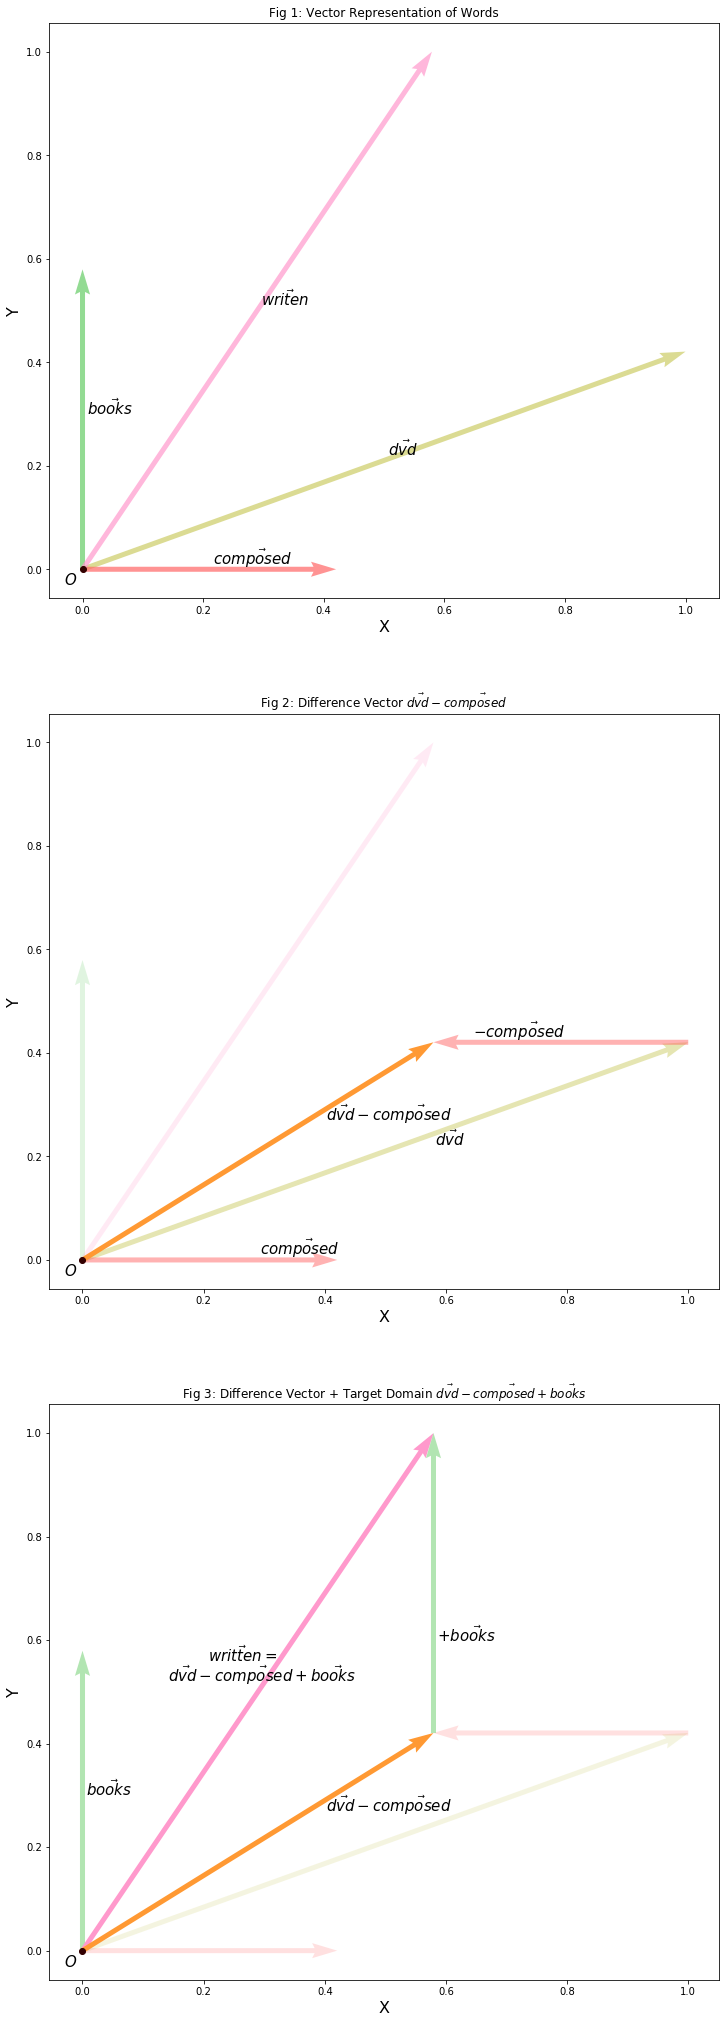

In [7]:
display_closestwords(["dvd","composed","books","writen"],word_embedding)